In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
data=pd.read_csv('0710.csv',encoding='utf8')

In [3]:
def convert_time_format(time_str):
    time_obj = datetime.strptime(time_str, '%H%M%S')
    return time_obj.strftime('%H:%M:%S')

def classify_time(time_str):
    time_obj = datetime.strptime(time_str, '%H:%M:%S')
    hour = time_obj.hour

    if hour >= 0 and hour < 6:
        return '半夜至清晨'
    elif hour >= 6 and hour < 12:
        return '早上'
    elif hour >= 12 and hour < 18:
        return '下午'
    else:
        return '傍晚至晚上'

data['發生時間'] = data['發生時間'].astype(str).str.zfill(6)

data['發生時間'] = data['發生時間'].apply(convert_time_format)

data['time_category'] = data['發生時間'].apply(classify_time)

data.insert(loc = data.columns.get_loc('發生時間') + 1, column='時間分類', value=data['time_category'])

data = data.drop('time_category', axis = 1)

data

,發生年度,發生月份,發生日期,發生時間,時間分類,事故類別名稱,處理單位名稱警局層,發生地點,行政區,天候名稱,...,死亡人數,受傷人數,當事者區分-類別-大類別名稱-車種,當事者區分-類別-子類別名稱-車種,當事者屬-性-別名稱,當事者事故發生時年齡,當事者行動狀態大類別名稱,經度,緯度,Unnamed: 22
0,2020,1,3,02:38:00,半夜至清晨,A1,新北市政府警察局,新北市中和區景平路 / 新北市中和區景安路,新北市中和區,陰,...,1,0,小貨車(含客、貨兩用),自用,男,71,車的狀態,121.505006,24.993558,NaN
1,2020,1,3,08:56:00,早上,A1,臺北市政府警察局,臺北市南港區研究院路2段 / 臺北市南港區研究院路2段,臺北市南港區,晴,...,1,0,小客車,自用,男,23,車的狀態,121.615942,25.044450,NaN
2,2020,1,6,11:25:00,早上,A1,臺北市政府警察局,臺北市中正區中華路1段 / 臺北市中正區漢口街1段,臺北市中正區,晴,...,1,0,小貨車(含客、貨兩用),自用,男,24,車的狀態,121.509371,25.045220,NaN
3,2020,1,6,19:18:00,傍晚至晚上,A1,新北市政府警察局,新北市新店區北新路1段 / 新北市新店區力行路,新北市新店區,陰,...,1,0,小貨車(含客、貨兩用),自用,男,48,車的狀態,121.540362,24.964583,NaN
4,2020,1,8,07:30:00,早上,A1,臺中市政府警察局,臺中市中區公園里自由路二段前0.0公尺,臺中市中區,晴,...,1,0,小客車,自用,女,71,車的狀態,120.682900,24.140782,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,2022,12,31,21:50:00,傍晚至晚上,A2,桃園市政府警察局,桃園市八德區廣福路口 / 桃園市八德區永豐路口,桃園市八德區,雨,...,0,1,小客車,自用,女,51,車的狀態,121.279148,24.960691,NaN
22616,2022,12,31,21:55:00,傍晚至晚上,A2,新北市政府警察局,新北市三重區過圳街 / 新北市三重區三寧街,新北市三重區,陰,...,0,2,機車,普通重型,男,26,車的狀態,121.488443,25.059041,NaN
22617,2022,12,31,22:00:00,傍晚至晚上,A2,臺北市政府警察局,臺北市大安區安東街 / 臺北市大安區安東街,臺北市大安區,雨,...,0,2,機車,普通重型,男,29,車的狀態,121.542235,25.044046,NaN
22618,2022,12,31,23:15:00,傍晚至晚上,A2,臺北市政府警察局,臺北市大安區信義路4段 / 臺北市大安區安和路2段,臺北市大安區,雨,...,0,1,小客車,自用,男,27,車的狀態,121.552433,25.033015,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22620 entries, 0 to 22619
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   發生年度               22620 non-null  int64  
 1   發生月份               22620 non-null  int64  
 2   發生日期               22620 non-null  int64  
 3   發生時間               22620 non-null  object 
 4   時間分類               22620 non-null  object 
 5   事故類別名稱             22620 non-null  object 
 6   處理單位名稱警局層          22620 non-null  object 
 7   發生地點               22620 non-null  object 
 8   行政區                22620 non-null  object 
 9   天候名稱               22620 non-null  object 
 10  事故位置子類別名稱          22620 non-null  object 
 11  路面狀況-路面鋪裝名稱        22620 non-null  object 
 12  路面狀況-路面狀態名稱        22620 non-null  object 
 13  肇因研判子類別名稱-主要       22620 non-null  object 
 14  死亡人數               22620 non-null  int64  
 15  受傷人數               22620 non-null  int64  
 16  當事者區分-類別-大類別名稱-車種  226

## 每三小時事故頻率

C:\Users\shawn\AppData\Local\Temp\ipykernel_10108\1544548016.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  accident_freq.index = accident_freq.index.astype(str).str.replace('(', '').str.replace(']', '').str.replace(',', '~')
C:\Users\shawn\AppData\Local\Temp\ipykernel_10108\1544548016.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  accident_freq.index = accident_freq.index.astype(str).str.replace('(', '').str.replace(']', '').str.replace(',', '~')


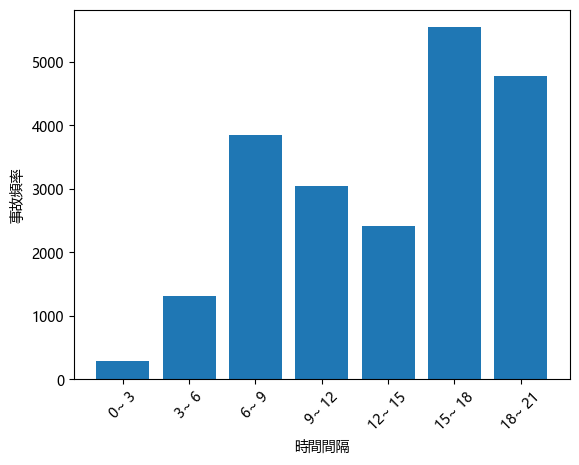

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Microsoft YaHei'

data['發生時間'] = pd.to_datetime(data['發生時間'])
data['時間間隔'] = pd.cut(data['發生時間'].dt.hour, bins=range(0, 24, 3))

accident_freq = data['時間間隔'].value_counts().sort_index()
accident_freq.index = accident_freq.index.astype(str).str.replace('(', '').str.replace(']', '').str.replace(',', '~')
plt.bar(accident_freq.index, accident_freq.values)
plt.xlabel('時間間隔')
plt.ylabel('事故頻率')
# plt.title('每三小時事故頻率')
plt.xticks(rotation=45)
plt.show()


## 各月份發生事故數量

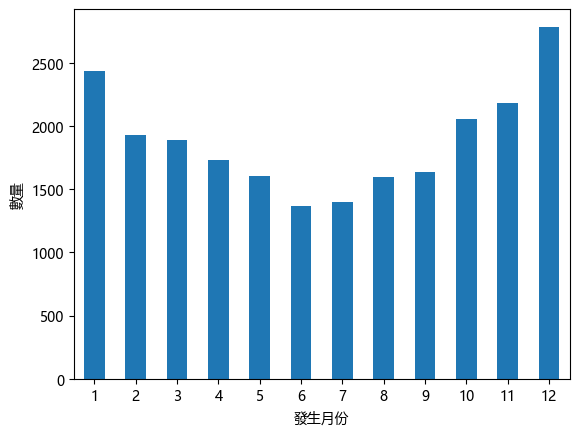

In [71]:
import matplotlib.pyplot as plt

grouped = data.groupby('發生月份').size()
grouped.plot(kind='bar')
plt.xlabel('發生月份')
plt.ylabel('數量')
plt.xticks(rotation=0)
plt.show()



## 性別

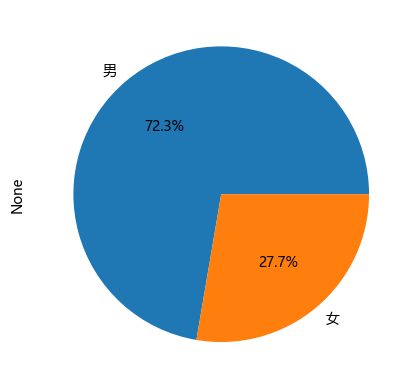

In [72]:
import matplotlib.pyplot as plt

grouped = data.groupby('當事者屬-性-別名稱').size()
top_two = grouped.nlargest(2) 

plt.rcParams['font.family'] = 'Microsoft YaHei'
colors = ['#1f77b4', '#ff7f0e'] 

top_two.plot(kind='pie', autopct='%.1f%%', colors=colors)
plt.show()


## 肇因研判

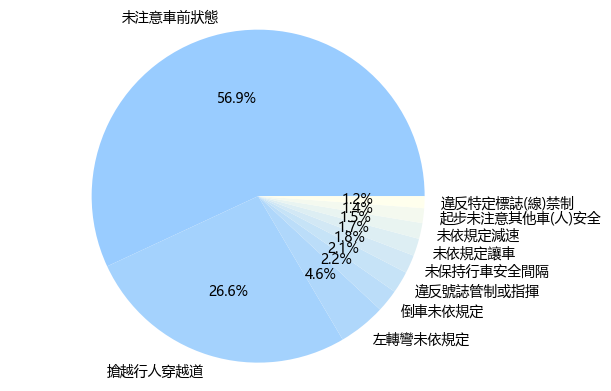

In [22]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

grouped = data.groupby('肇因研判子類別名稱-主要').size()
grouped = grouped.sort_values(ascending=False).head(10)

colors = [(0.6, 0.8, 1), (1,1,0.93)] 
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.pie(grouped, labels=grouped.index, autopct='%.1f%%', colors=cmap(np.linspace(0, 1, len(grouped))))
plt.axis('equal')
plt.show()






## 當事者事故發生時年齡分佈

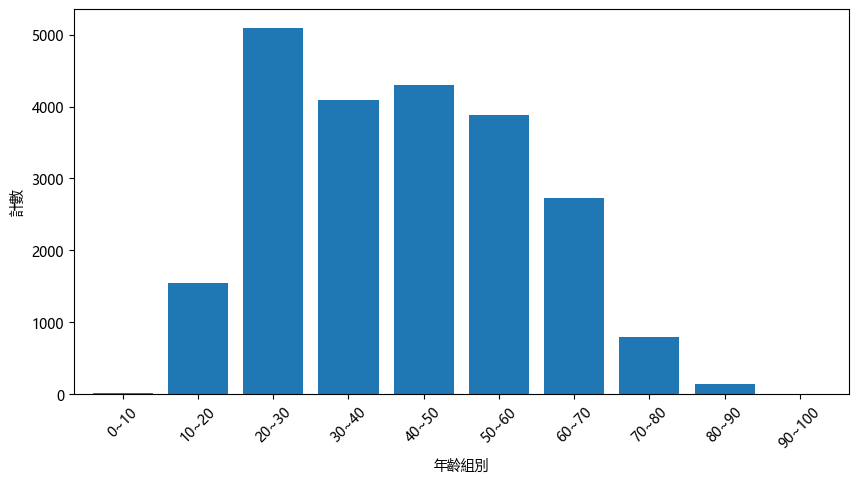

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

age_bins = range(0, 101, 10)
age_labels = [f"{start}~{start+10}" for start in age_bins[:-1]]

data["AgeGroup"] = pd.cut(data["當事者事故發生時年齡"], bins=age_bins, labels=age_labels, right=False)
age_counts = data["AgeGroup"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
age_counts.plot(kind="bar", width=0.8)
plt.xlabel("年齡組別")
plt.ylabel("計數")
plt.xticks(rotation=45)  # 若標籤過長可旋轉顯示
plt.show()



In [55]:
%matplotlib inline
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['發生月份', '發生日期', '事故類別名稱', "天候名稱", '事故位置子類別名稱', '路面狀況-路面鋪裝名稱', '路面狀況-路面狀態名稱', '肇因研判子類別名稱-主要', '當事者區分-類別-大類別名稱-車種', '當事者區分-類別-子類別名稱-車種', '當事者屬-性-別名稱', '當事者事故發生時年齡']

@interact(column=selected_columns)
def create_bar_plot(column):
    column_data = data[column]
    plt.figure(figsize=(10, 3))  # 設定圖的大小
    sns.barplot(x=column_data.value_counts().index, y=column_data.value_counts().values, palette='viridis')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


interactive(children=(Dropdown(description='column', options=('發生月份', '發生日期', '事故類別名稱', '天候名稱', '事故位置子類別名稱', '…

## 車禍死亡和受傷人數統計

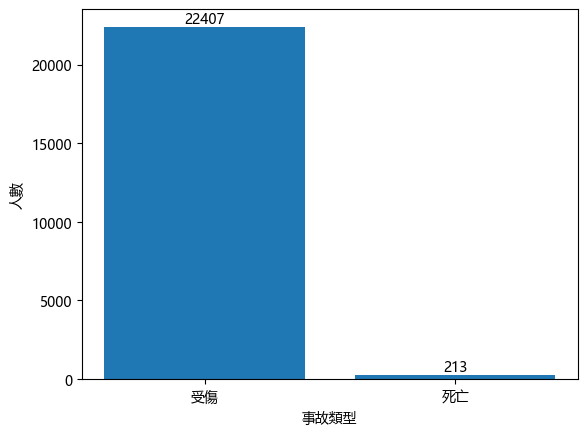

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft YaHei'
data['事故類型'] = '無人傷亡'
data.loc[(data['死亡人數'] > 0) & (data['受傷人數'] > 0), '事故類型'] = '死亡和受傷'
data.loc[data['死亡人數'] > 0, '事故類型'] = '死亡'
data.loc[data['受傷人數'] > 0, '事故類型'] = '受傷'

accident_counts = data['事故類型'].value_counts()

plt.bar(accident_counts.index, accident_counts.values)
plt.xlabel('事故類型')
plt.ylabel('人數')
for i, count in enumerate(accident_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


## 台灣各區域加總

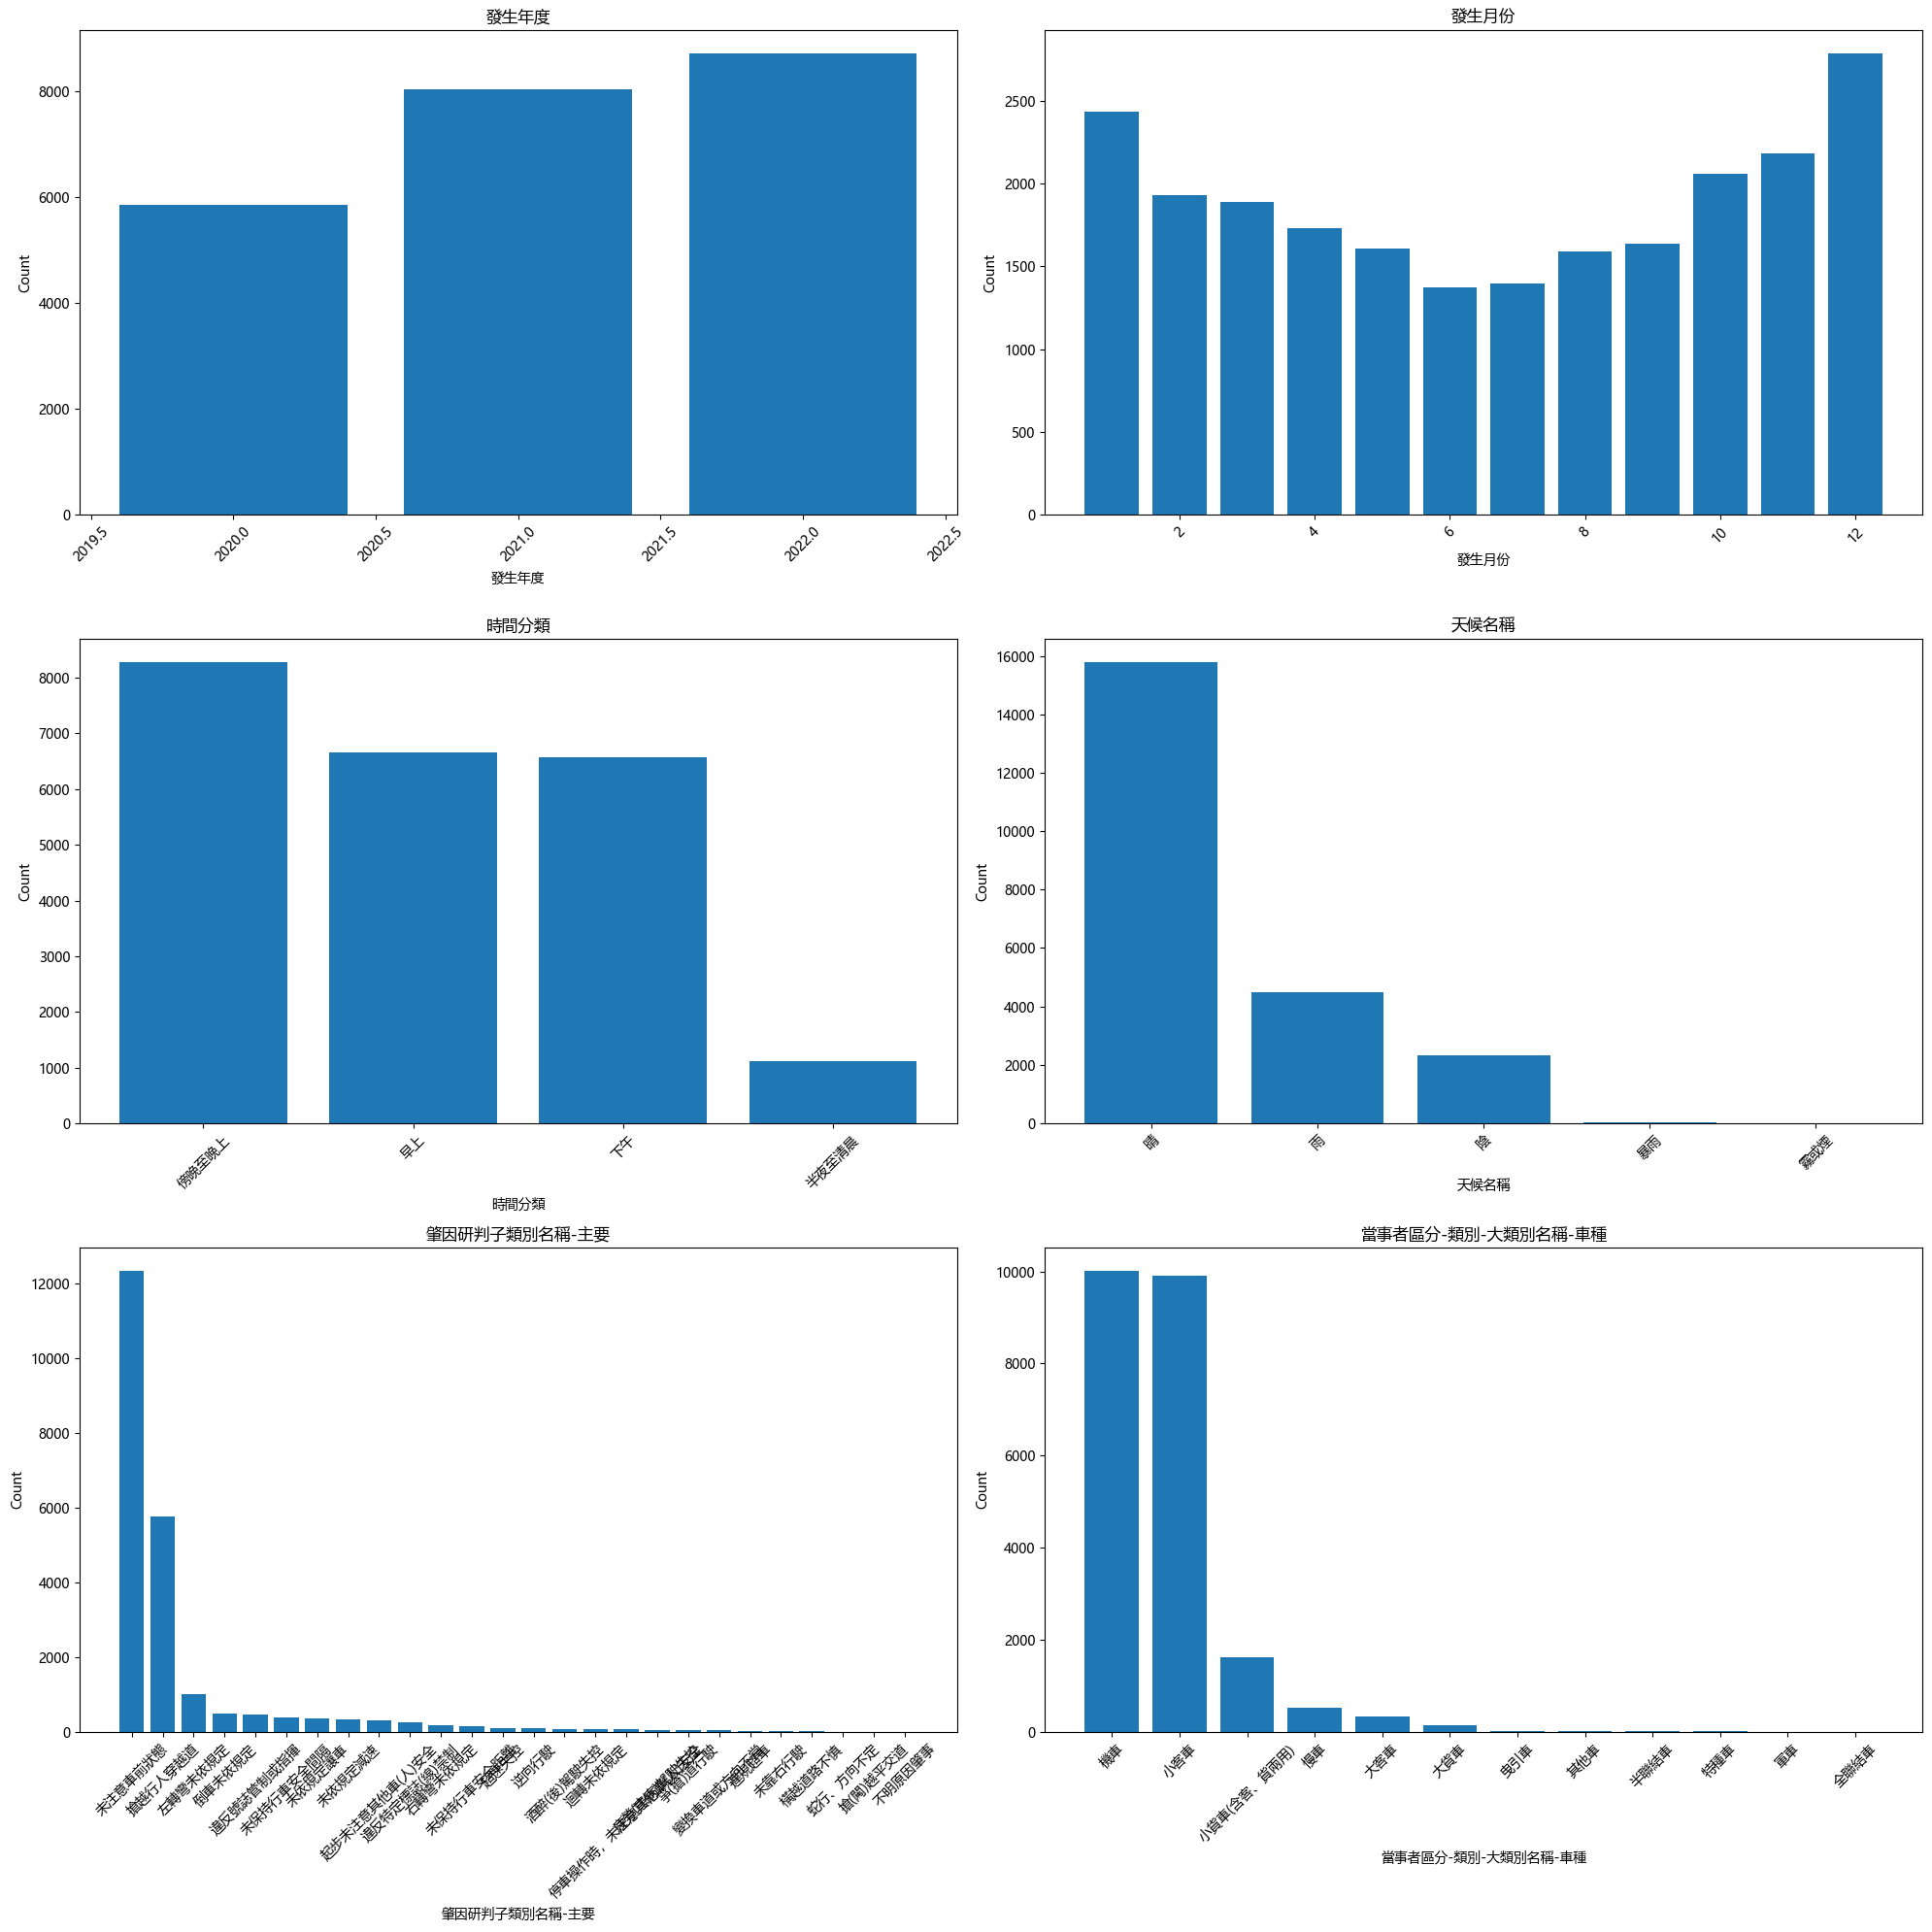

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = ['發生年度', '發生月份', '時間分類','天候名稱', '肇因研判子類別名稱-主要','當事者區分-類別-大類別名稱-車種']
n_rows = 3
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, column in enumerate(columns_to_plot):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    value_counts = data[column].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

## 桃園市桃園區

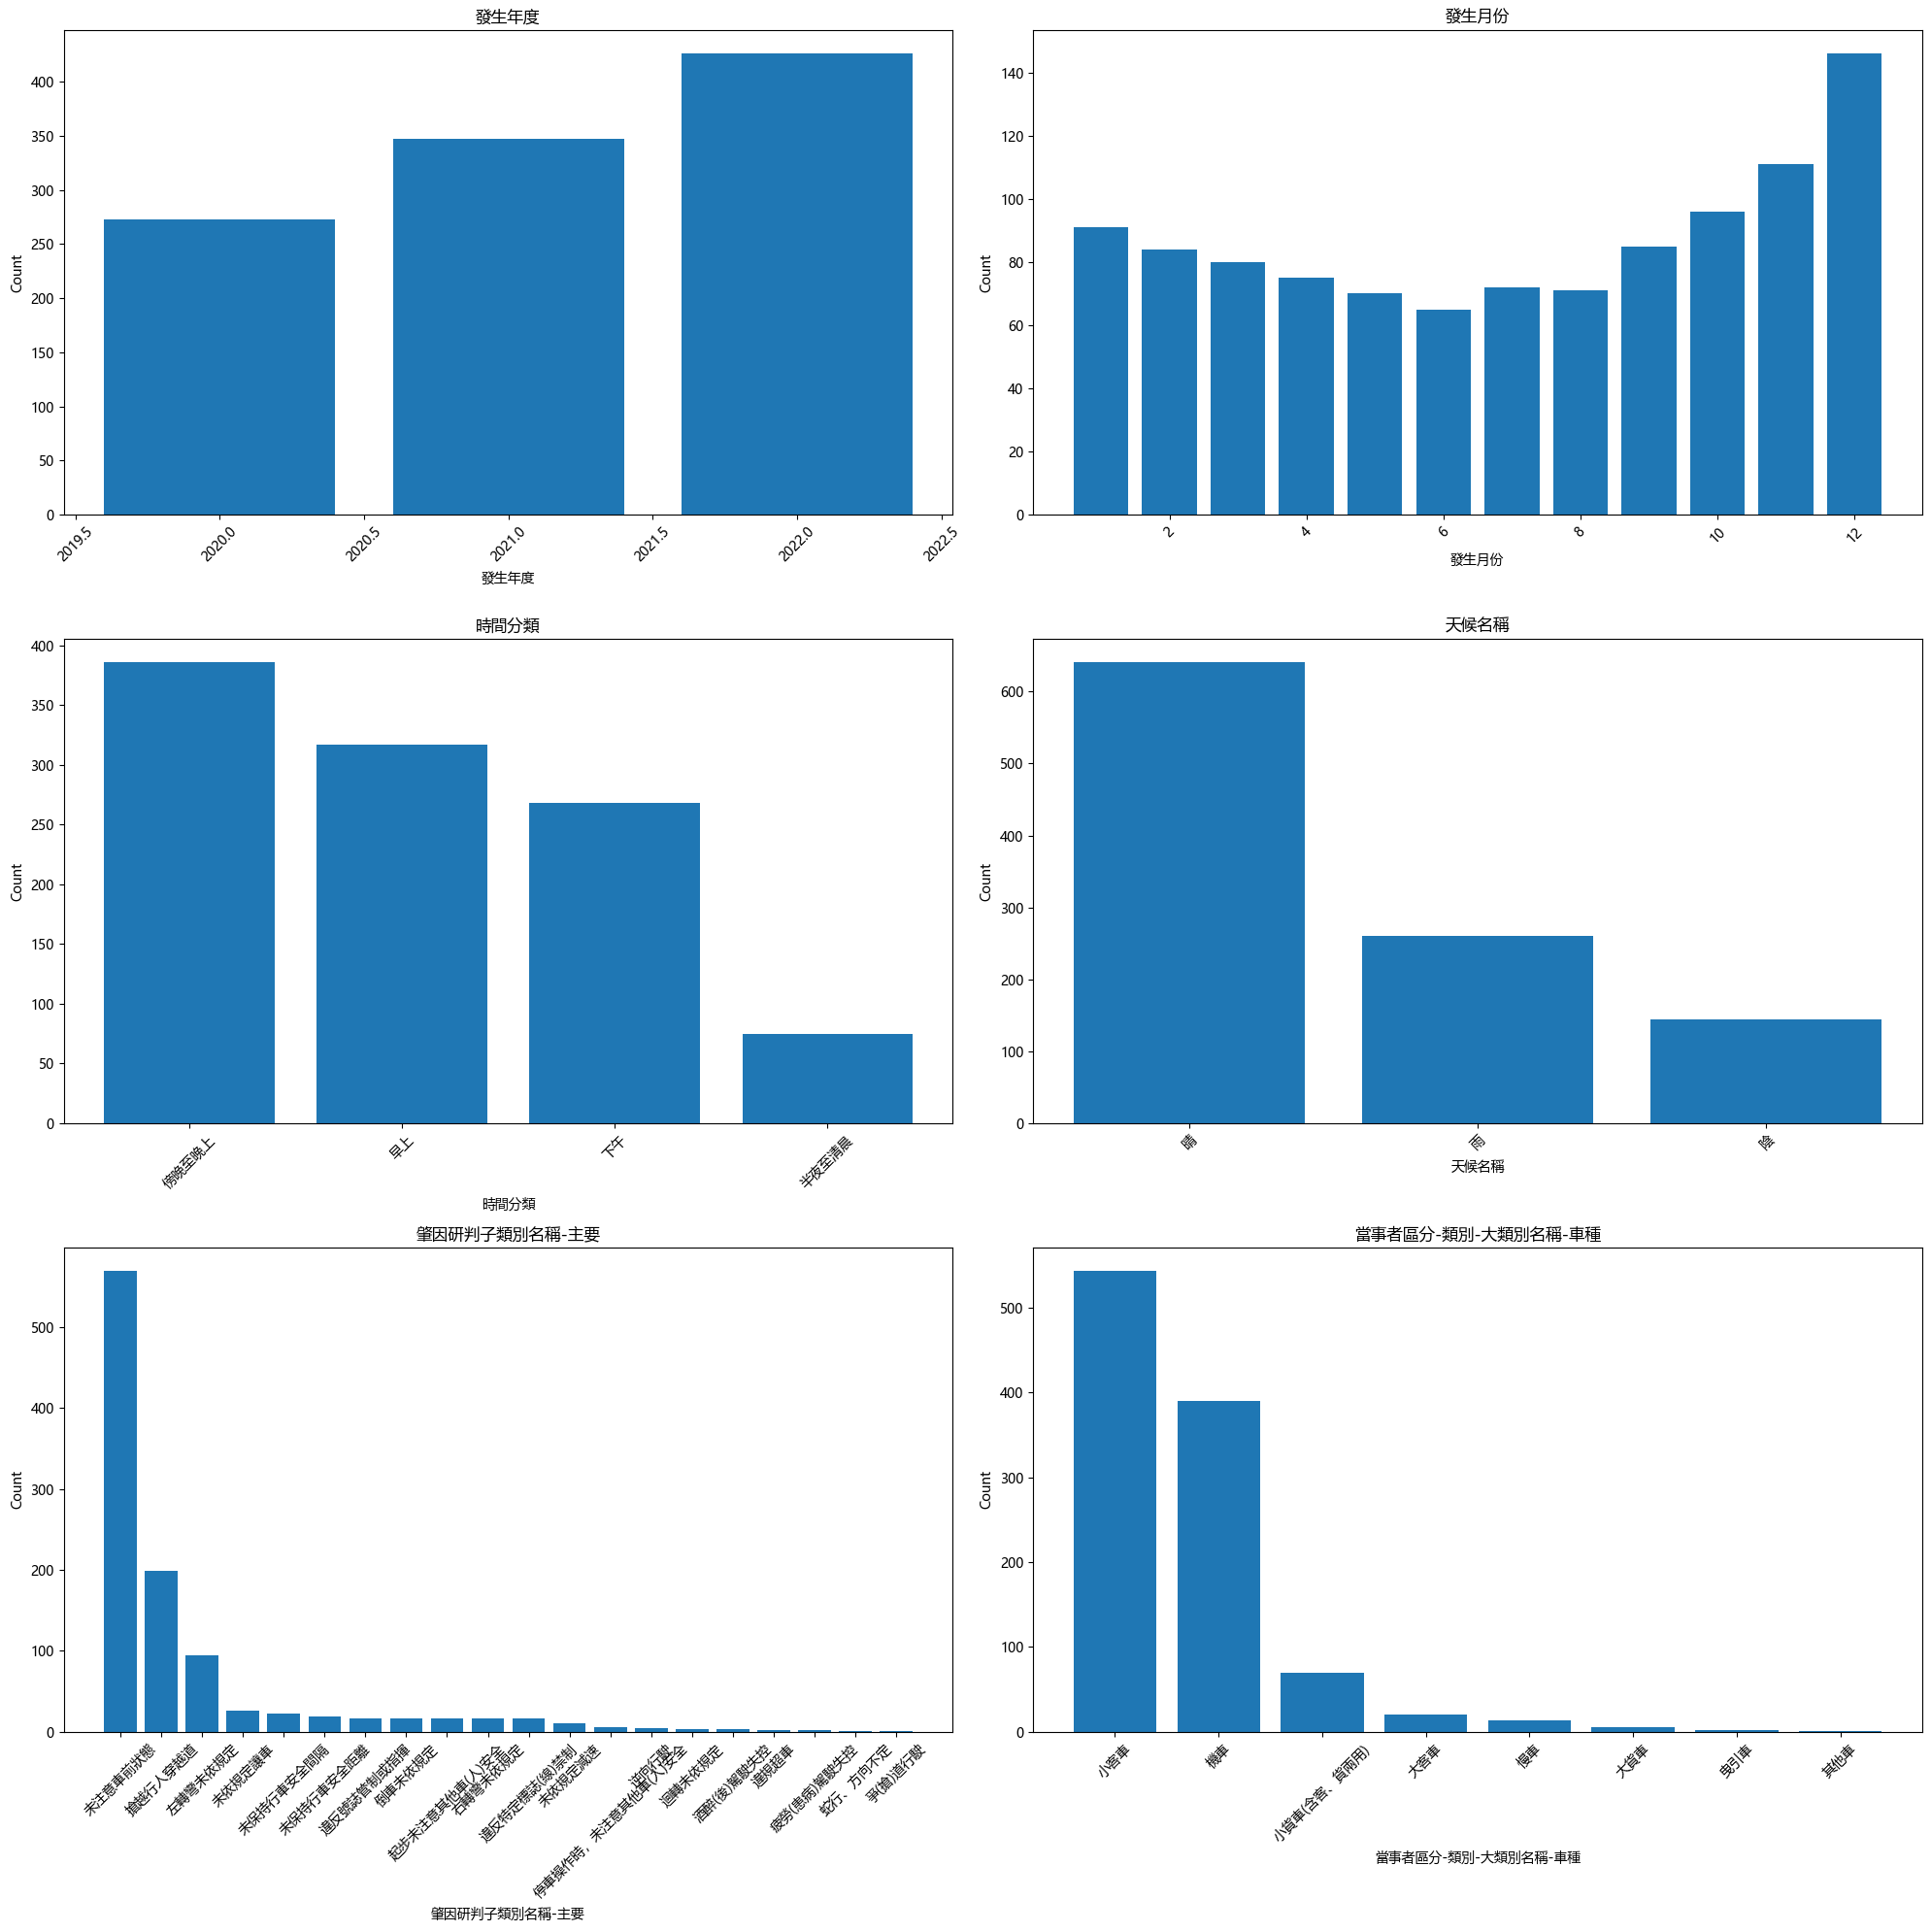

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

selected_district = '桃園市桃園區'
filtered_data = data[data['行政區'] == selected_district]
columns_to_plot = ['發生年度', '發生月份', '時間分類','天候名稱', '肇因研判子類別名稱-主要','當事者區分-類別-大類別名稱-車種']

n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, column in enumerate(columns_to_plot):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    value_counts = filtered_data[column].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()



## 桃園市中壢區

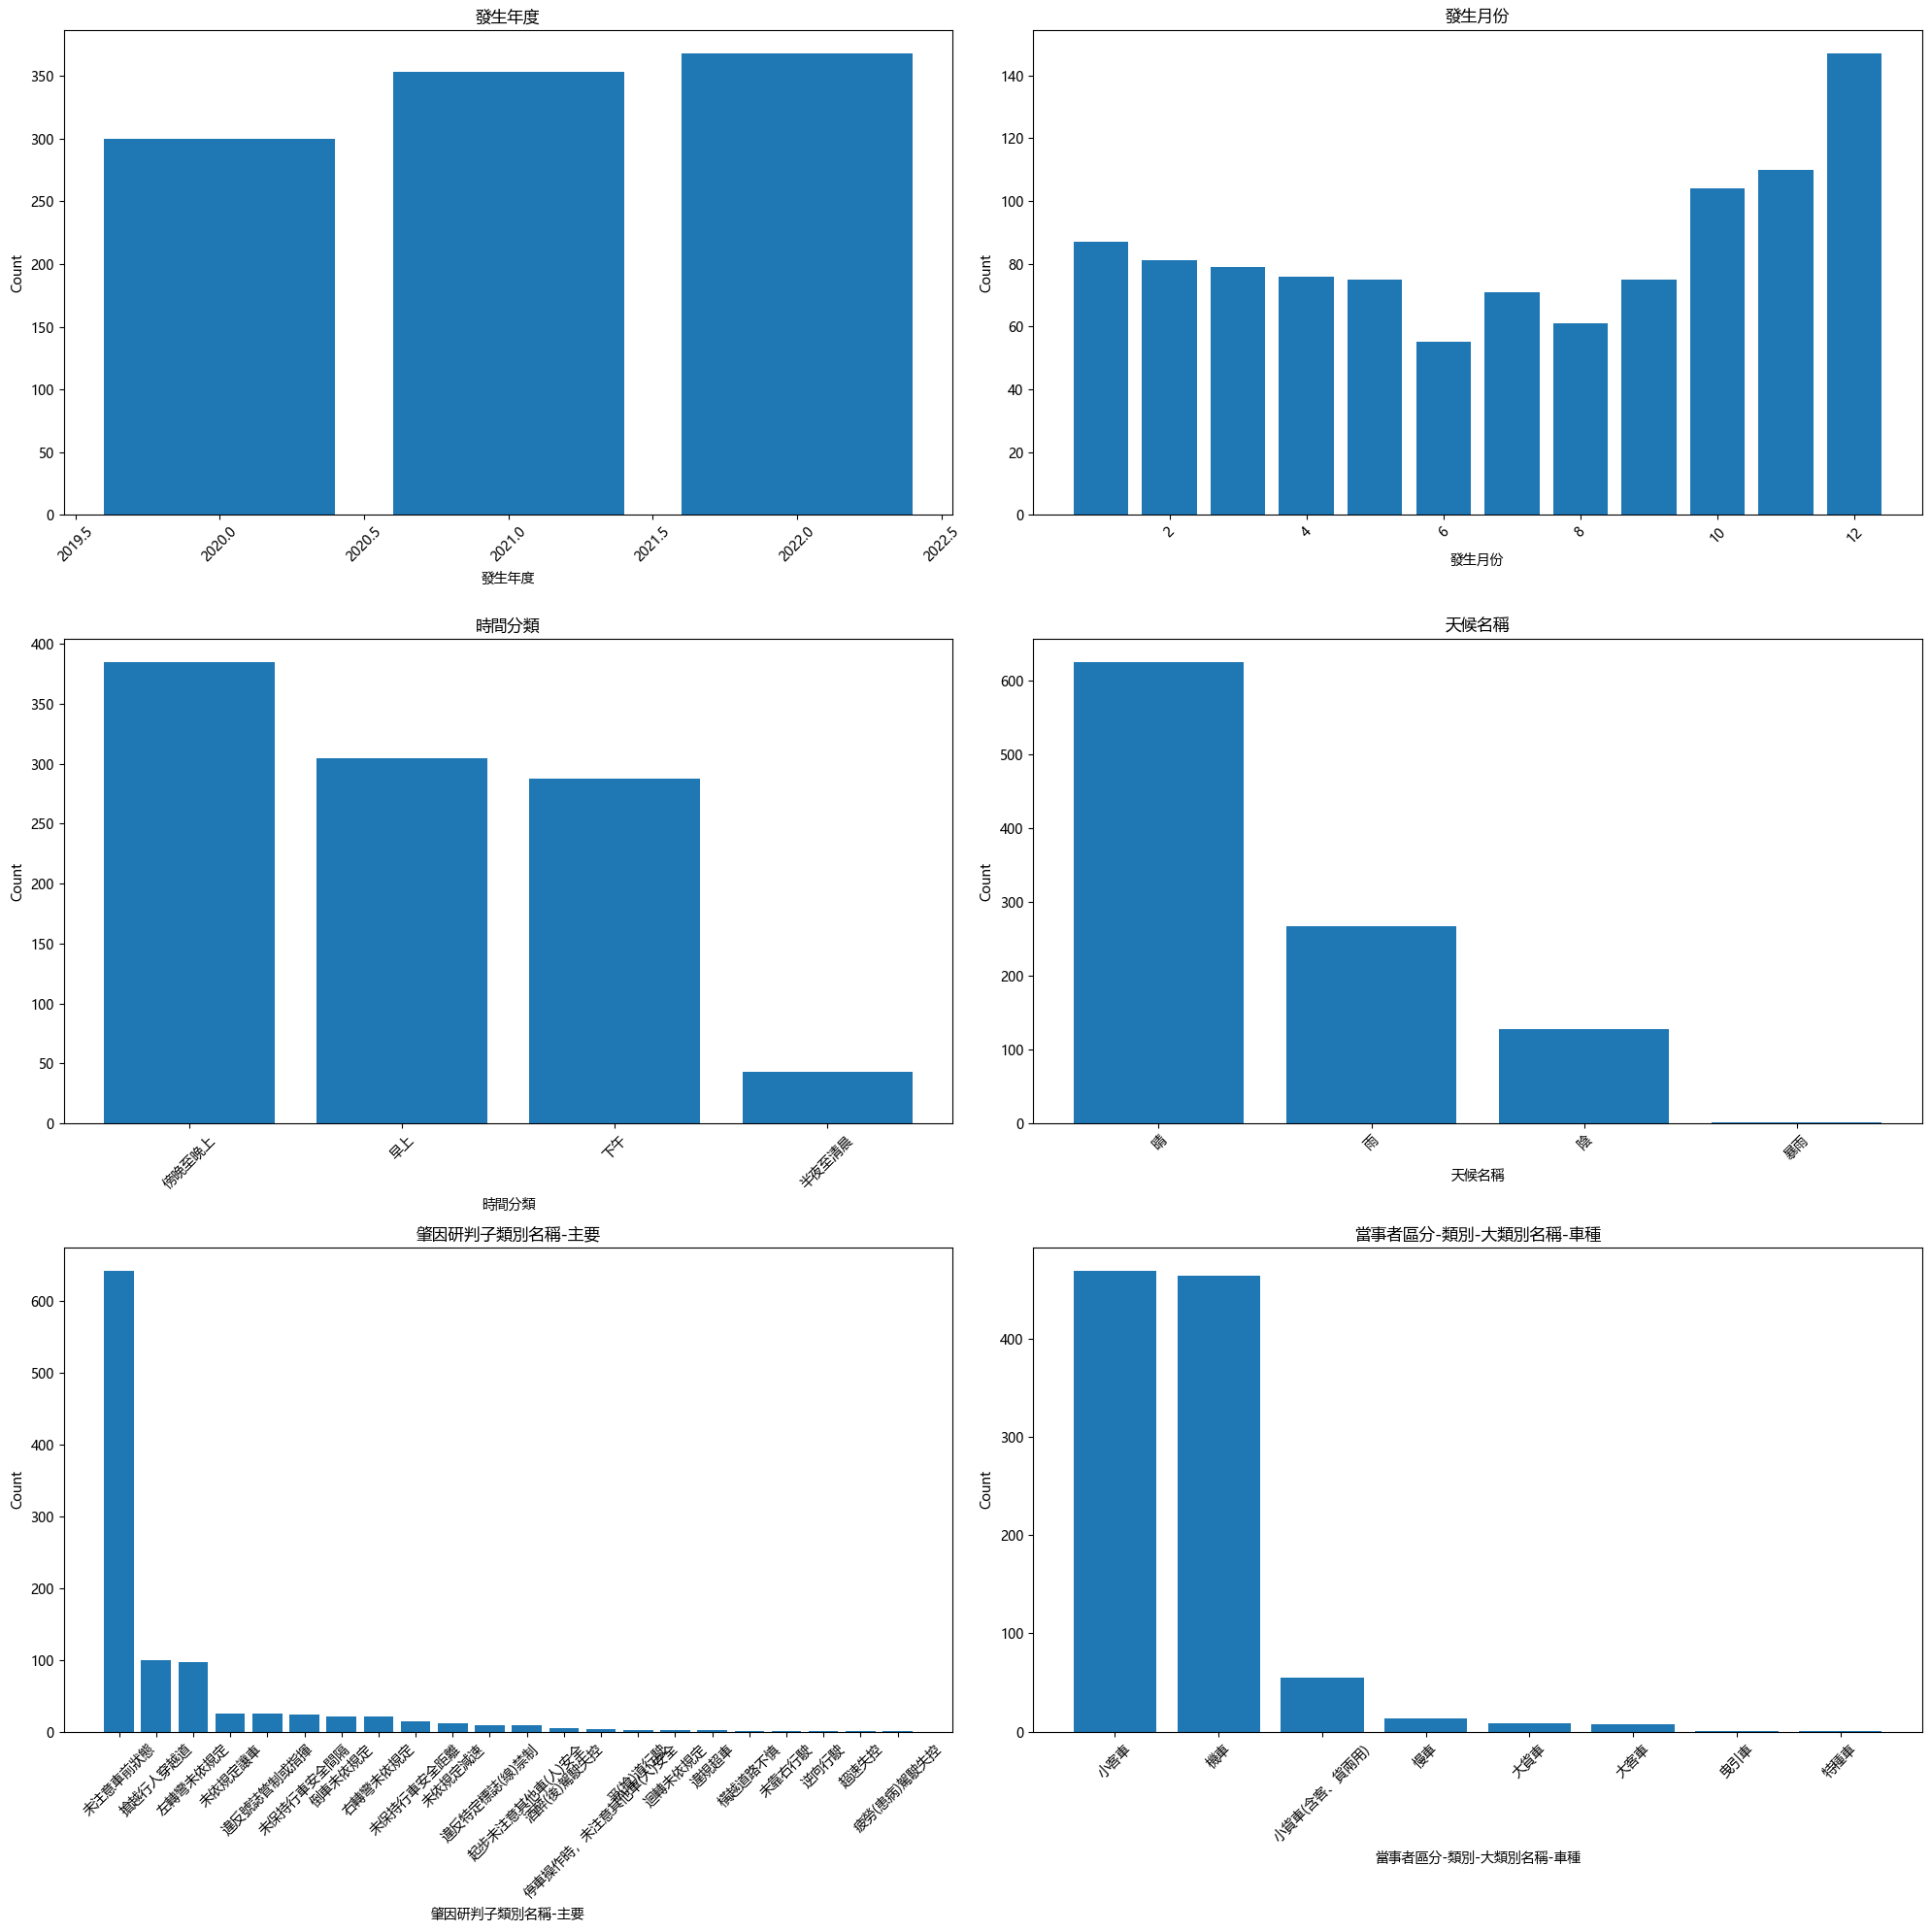

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

selected_district = '桃園市中壢區'
filtered_data = data[data['行政區'] == selected_district]
columns_to_plot = ['發生年度', '發生月份', '時間分類','天候名稱', '肇因研判子類別名稱-主要','當事者區分-類別-大類別名稱-車種']
n_rows = 3
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, column in enumerate(columns_to_plot):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    value_counts = filtered_data[column].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


## 新北市板橋區

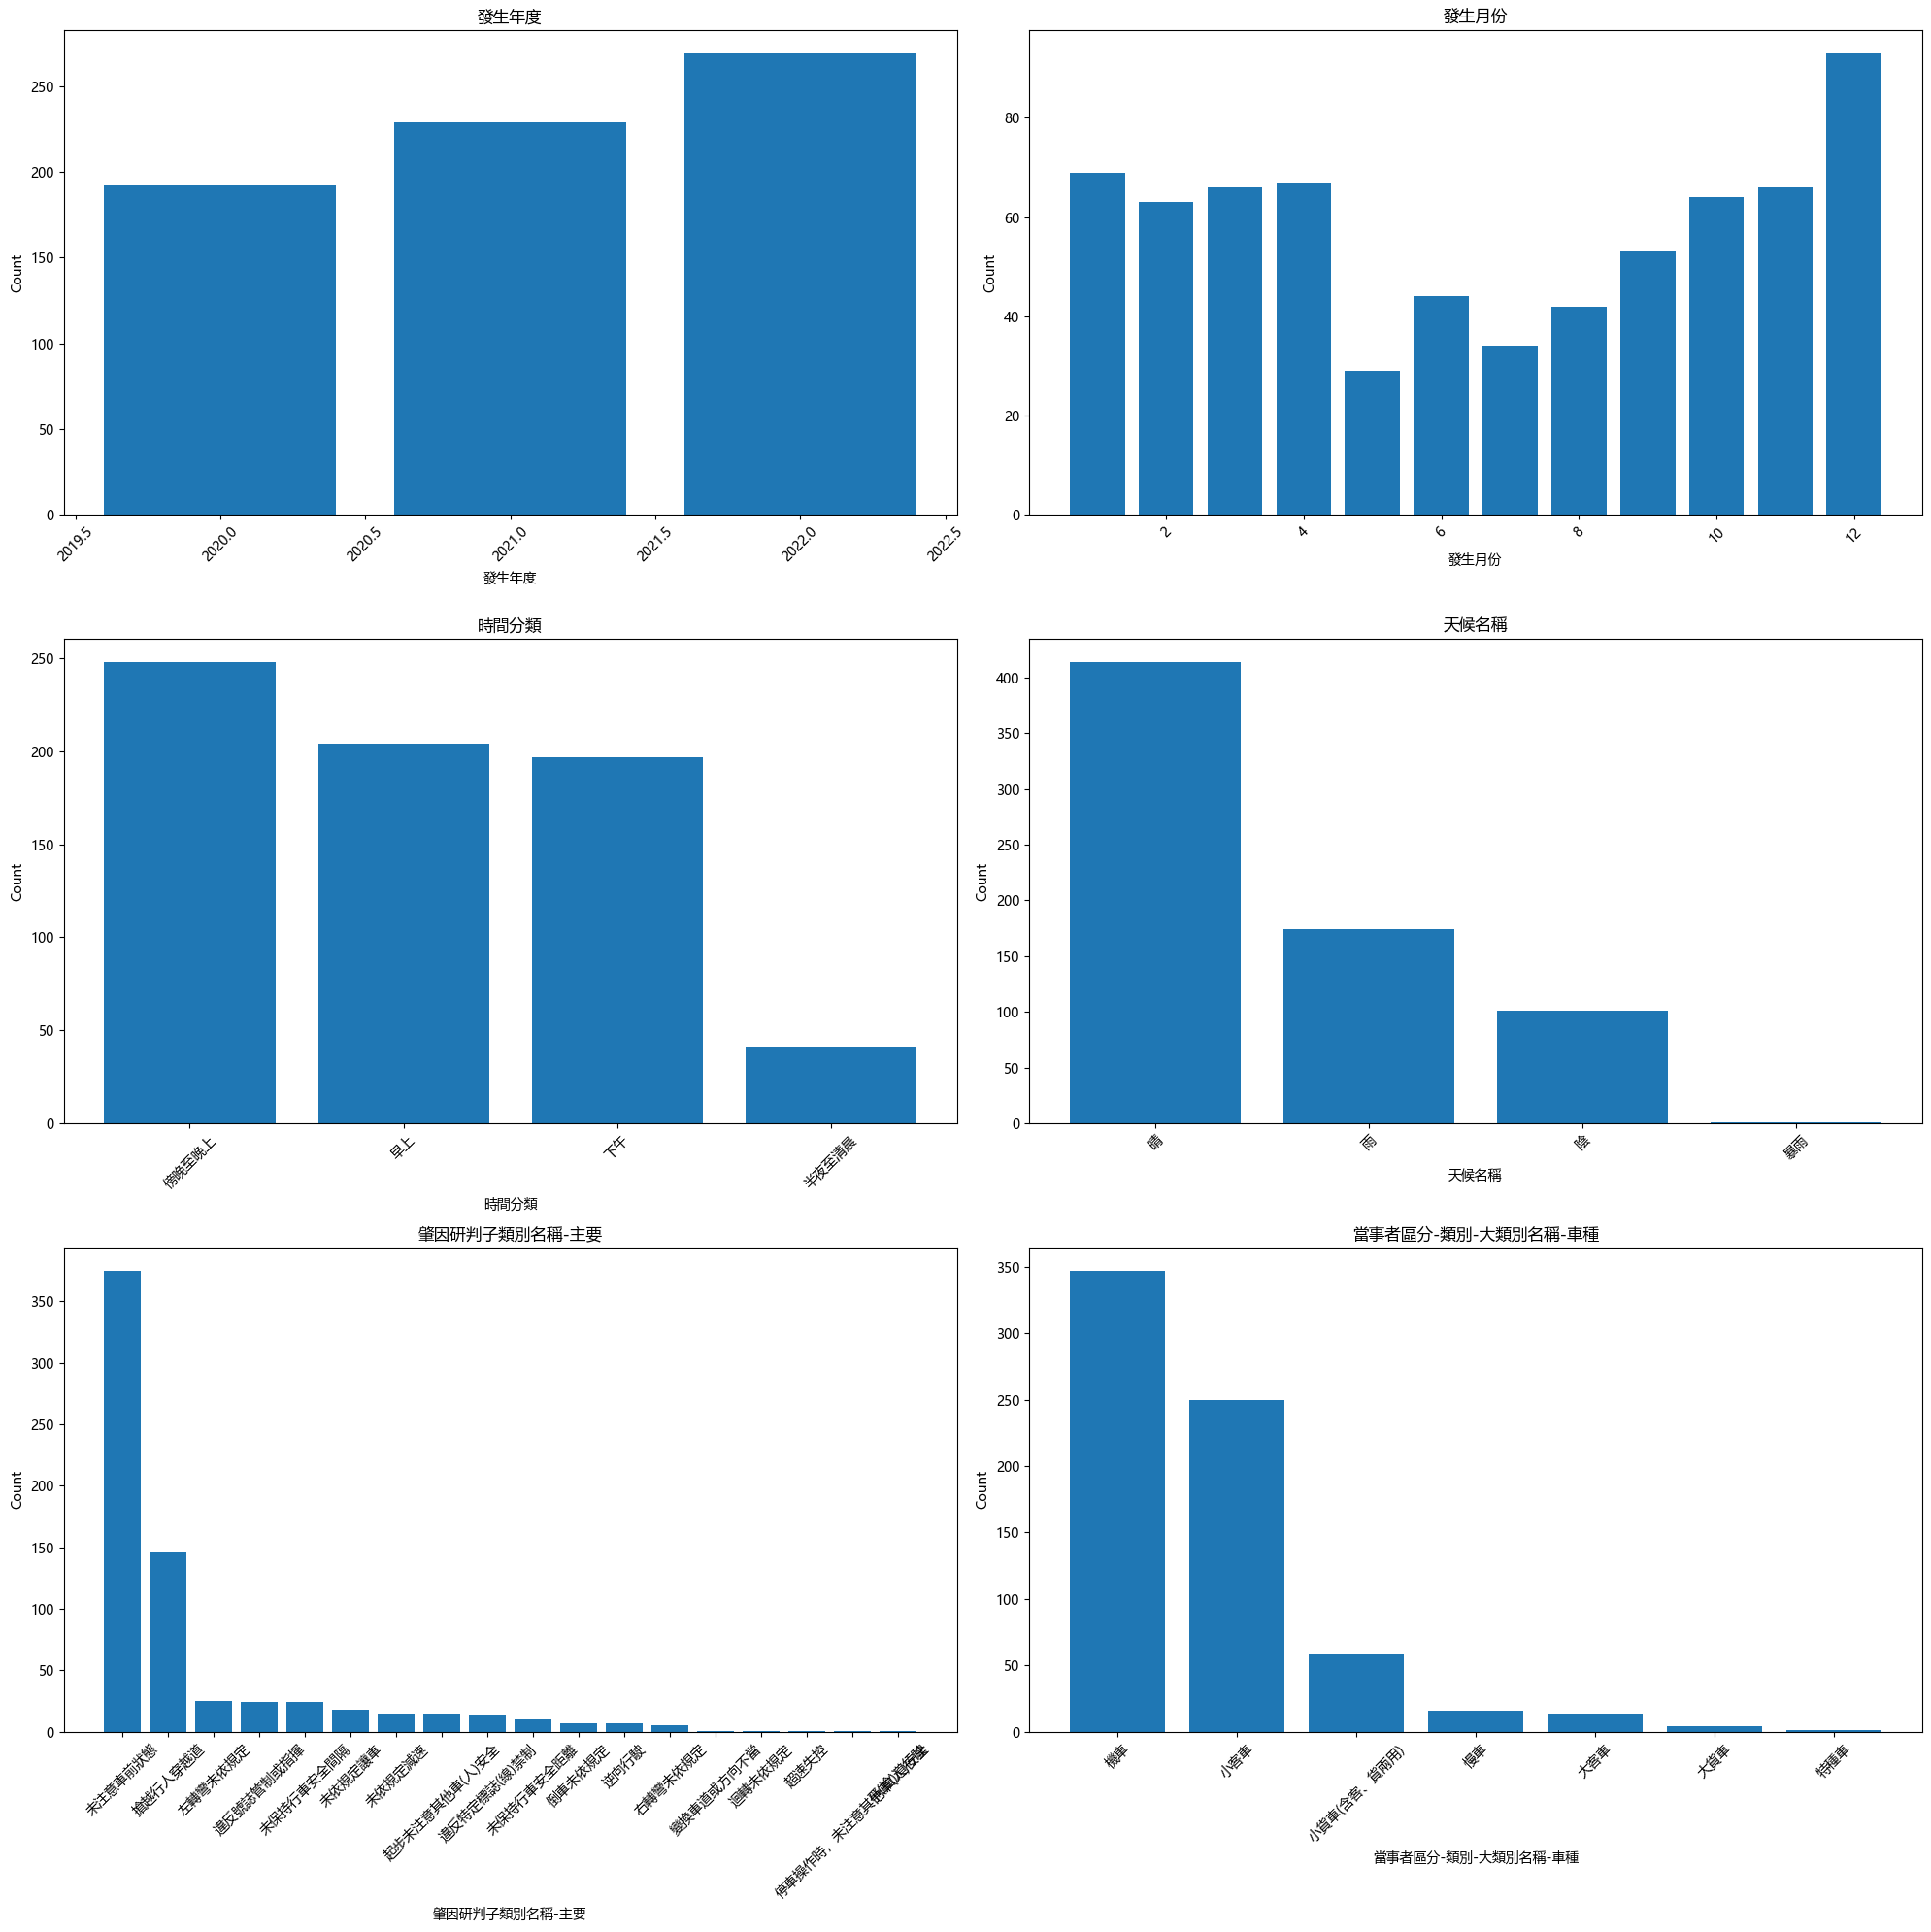

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

selected_district = '新北市板橋區'
filtered_data = data[data['行政區'] == selected_district]
columns_to_plot = ['發生年度', '發生月份', '時間分類','天候名稱', '肇因研判子類別名稱-主要','當事者區分-類別-大類別名稱-車種']
n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
for i, column in enumerate(columns_to_plot):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    value_counts = filtered_data[column].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


## 新北市三重區

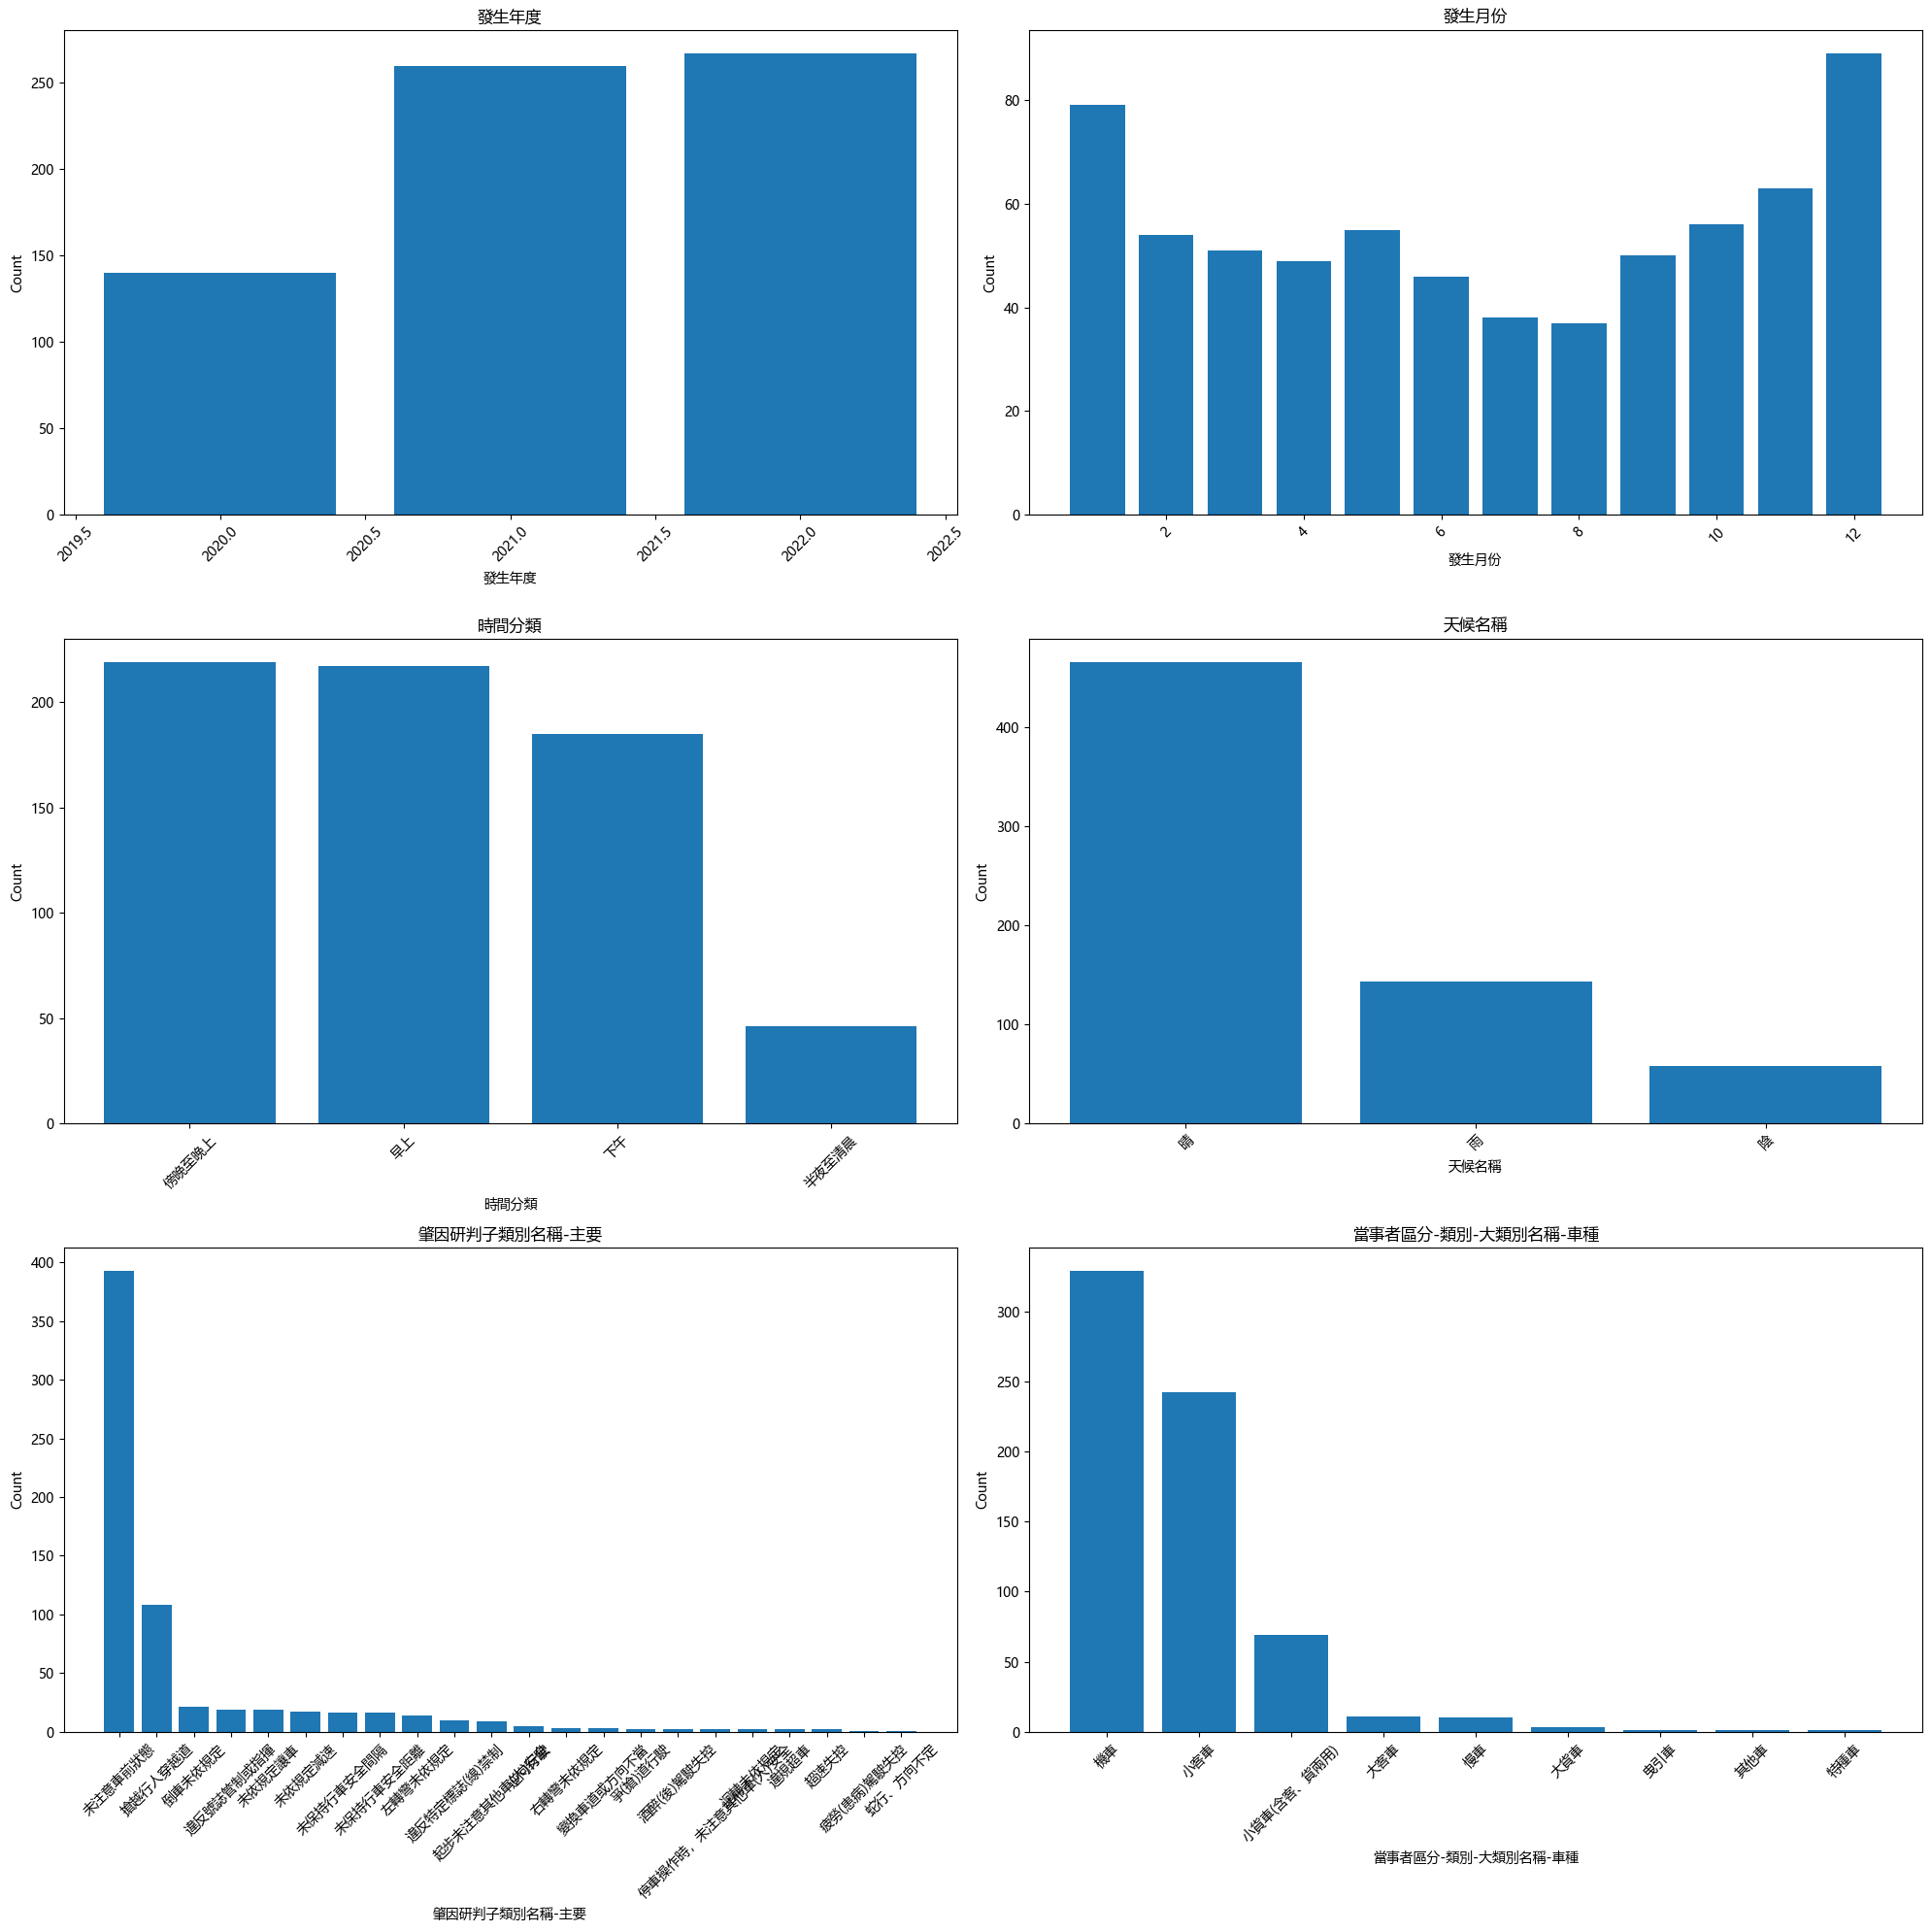

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

selected_district = '新北市三重區'
filtered_data = data[data['行政區'] == selected_district]
columns_to_plot = ['發生年度', '發生月份', '時間分類','天候名稱', '肇因研判子類別名稱-主要','當事者區分-類別-大類別名稱-車種']

n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
for i, column in enumerate(columns_to_plot):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    value_counts = filtered_data[column].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


## 新北市中和區

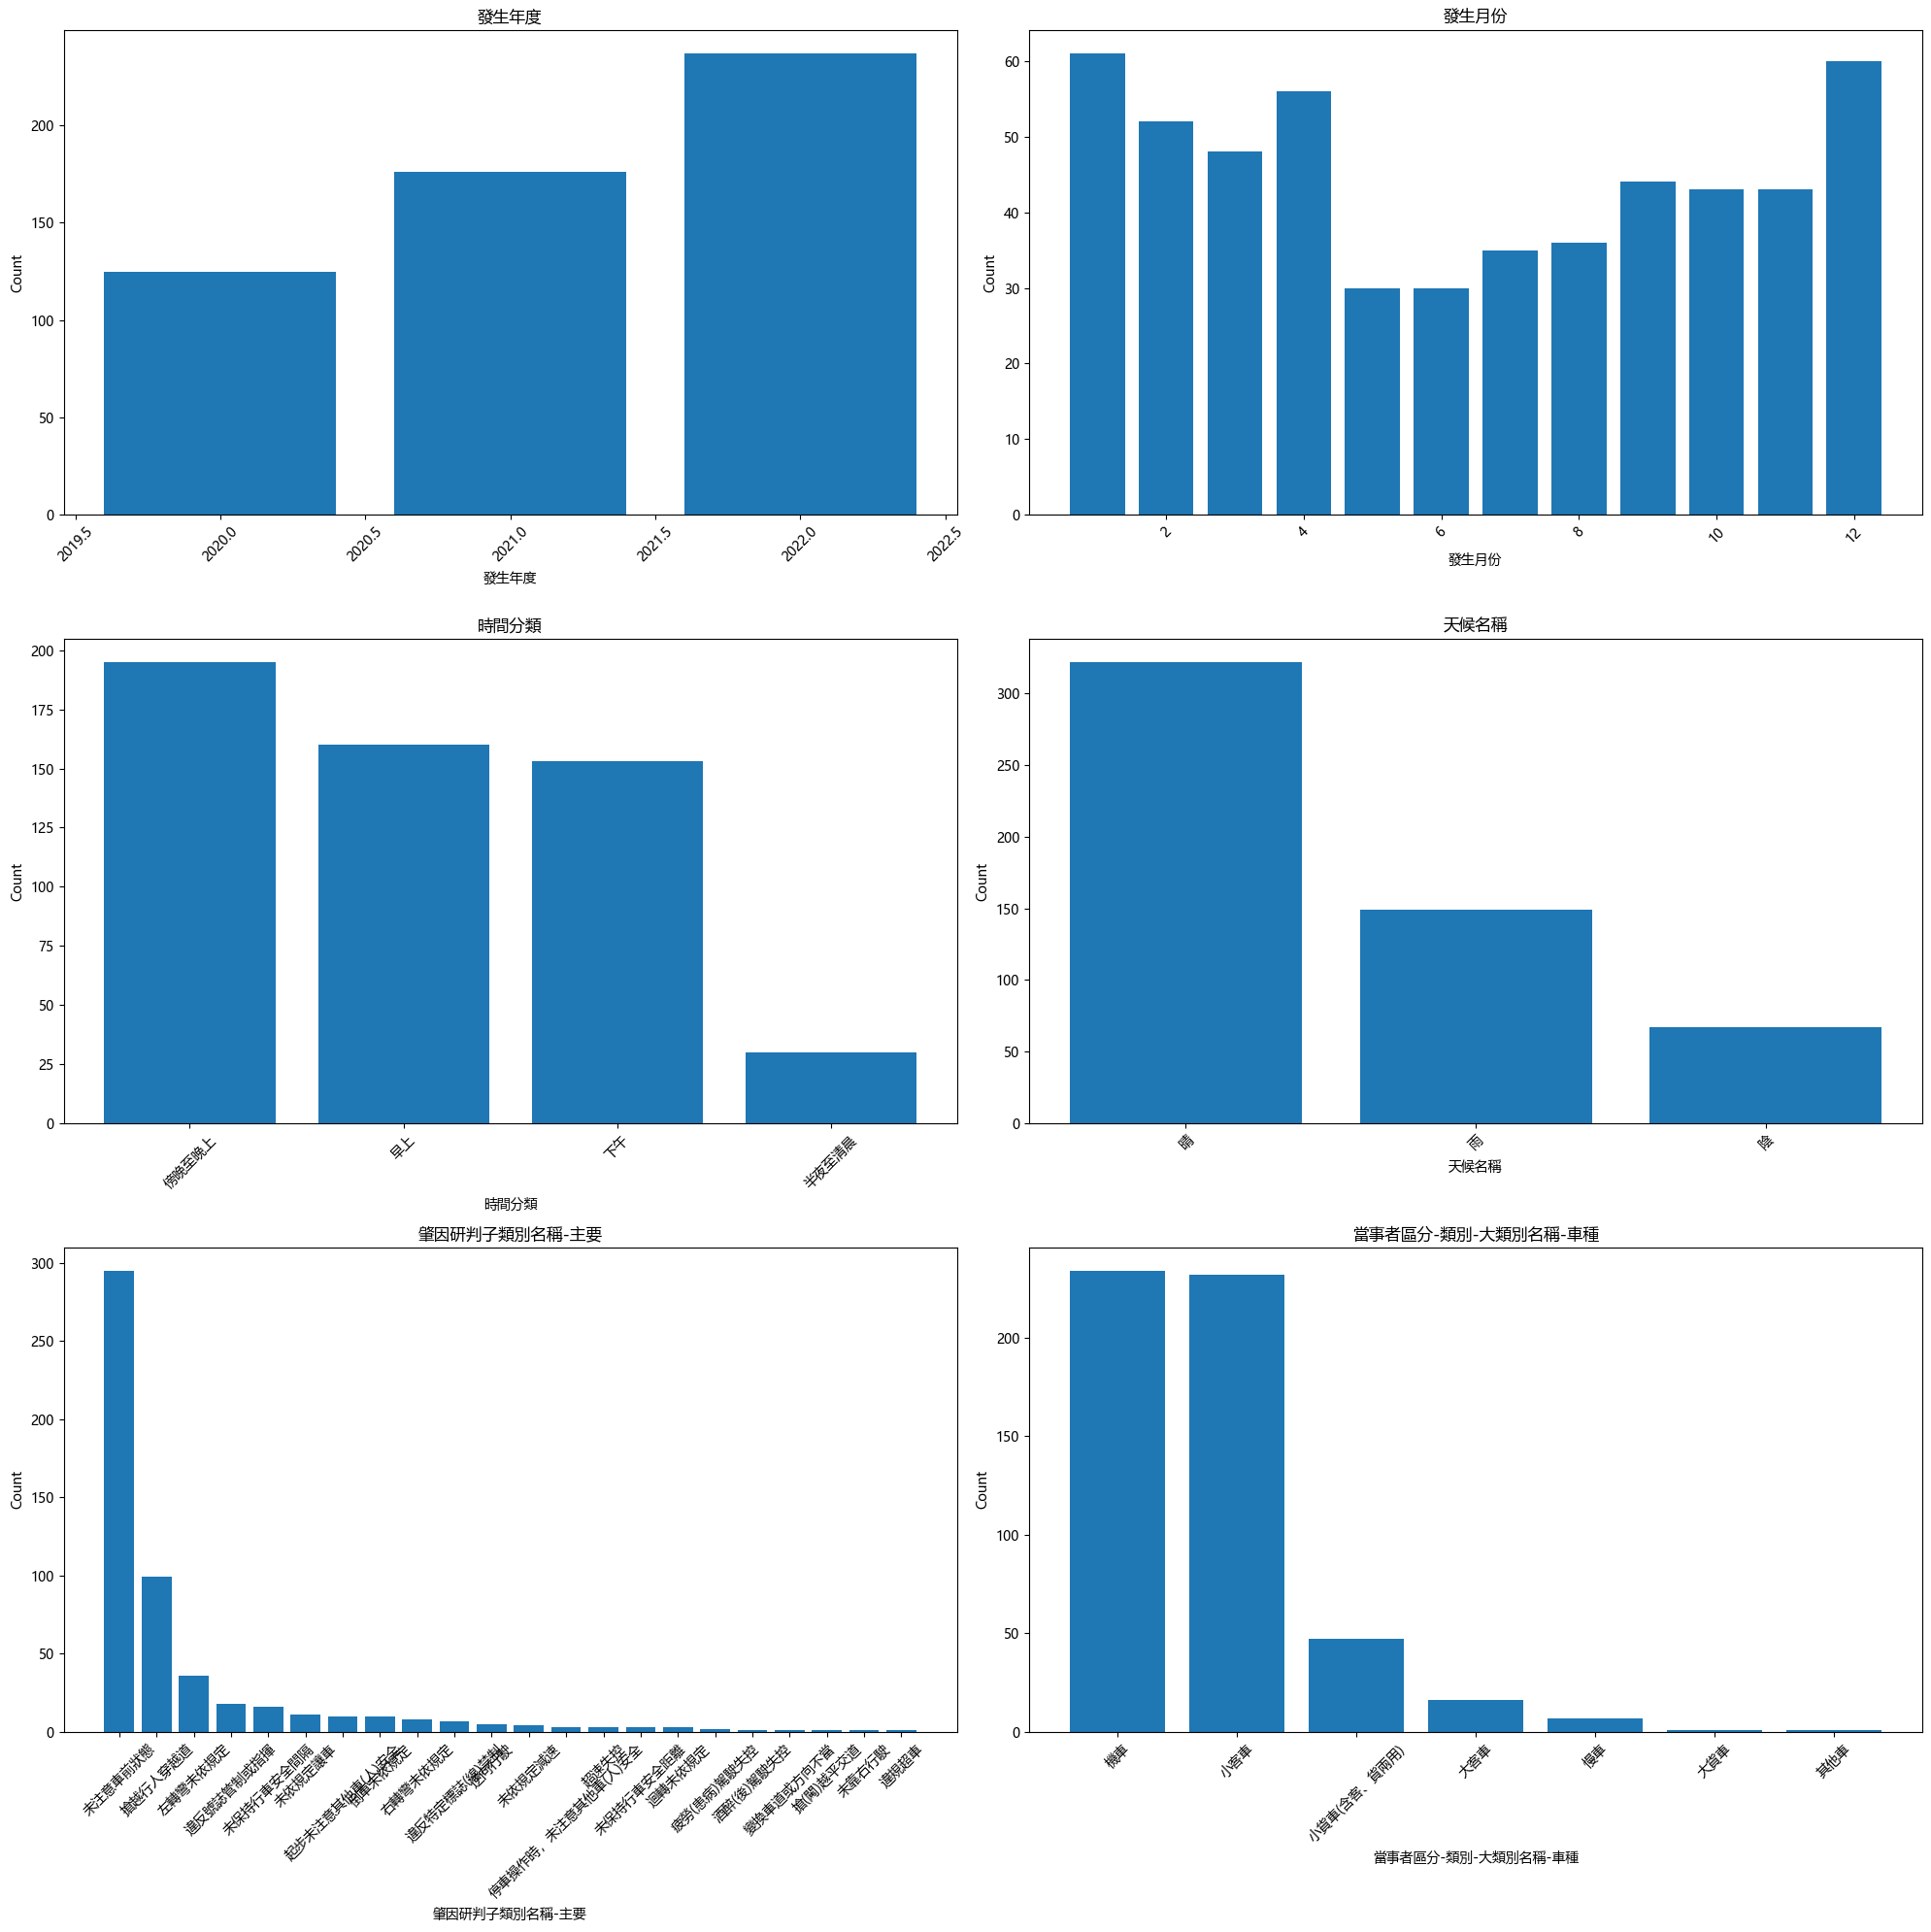

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

selected_district = '新北市中和區'
filtered_data = data[data['行政區'] == selected_district]
columns_to_plot = ['發生年度', '發生月份', '時間分類','天候名稱', '肇因研判子類別名稱-主要','當事者區分-類別-大類別名稱-車種']

n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
for i, column in enumerate(columns_to_plot):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    value_counts = filtered_data[column].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

## 車禍發生次數最高的行政區

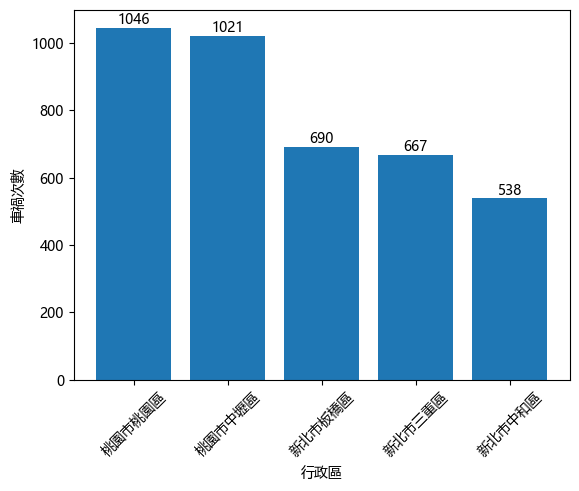

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

district_counts = data['行政區'].value_counts()
top_5_districts = district_counts.head(5)
plt.bar(top_5_districts.index, top_5_districts.values)
plt.xlabel('行政區')
plt.ylabel('車禍次數')
plt.xticks(rotation=45)

for i, v in enumerate(top_5_districts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()



## 死亡次數最高的行政區

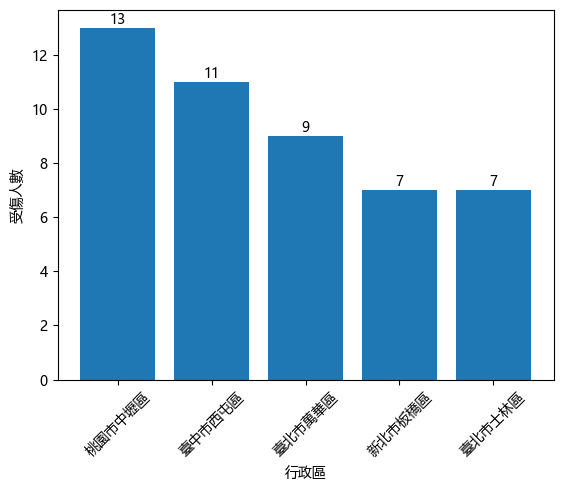

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

injury_counts = data.groupby('行政區')['死亡人數'].sum()
top_districts = injury_counts.nlargest(5)

plt.bar(top_districts.index, top_districts.values)
plt.xlabel('行政區')
plt.ylabel('受傷人數')
plt.xticks(rotation=45)
for i, v in enumerate(top_districts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


## 受傷次數最高的行政區

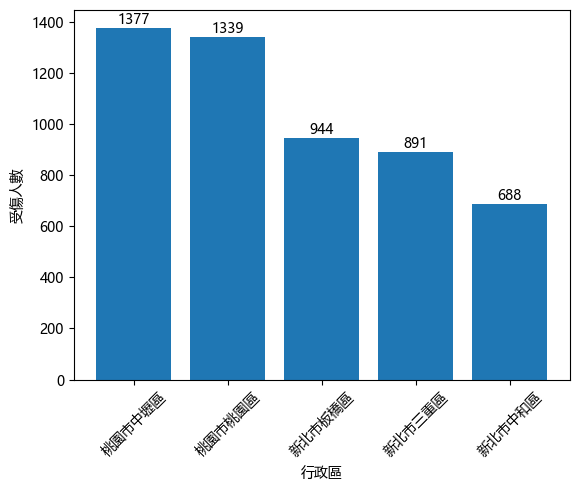

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

injury_counts = data.groupby('行政區')['受傷人數'].sum()
top_districts = injury_counts.nlargest(5)

plt.bar(top_districts.index, top_districts.values)
plt.xlabel('行政區')
plt.ylabel('受傷人數')
plt.xticks(rotation=45)

for i, v in enumerate(top_districts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()



## 駕駛最不專心的行政區

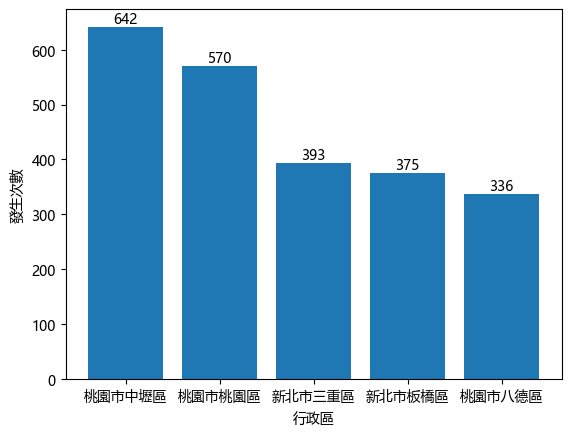

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = data[data['肇因研判子類別名稱-主要'] == '未注意車前狀態']
district_counts = filtered_data['行政區'].value_counts()
top_districts = district_counts.head(5)

plt.bar(top_districts.index, top_districts.values)
plt.xlabel('行政區')
plt.ylabel('發生次數')
for x, y in zip(top_districts.index, top_districts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()


## 最不愛禮讓行人的行政區

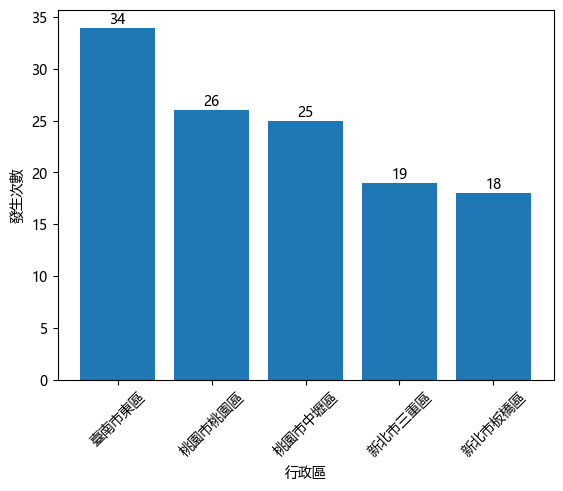

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = data[data['肇因研判子類別名稱-主要'] == '未依規定讓車']
district_counts = filtered_data['行政區'].value_counts()
top_districts = district_counts.head(5)

# 繪製長條圖
plt.bar(top_districts.index, top_districts.values)
plt.xlabel('行政區')
plt.ylabel('發生次數')
for i, v in enumerate(top_districts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()



## 最少發生車禍次數的五個行政區

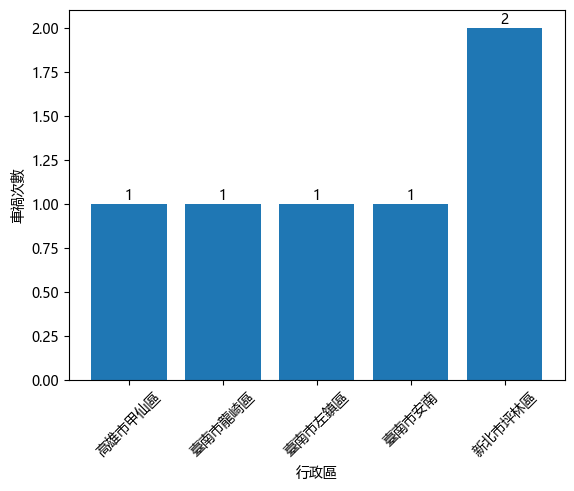

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

district_counts = data['行政區'].value_counts()
bottom_5_districts = district_counts.sort_values().head(5)

plt.bar(bottom_5_districts.index, bottom_5_districts.values)
plt.xlabel('行政區')
plt.ylabel('車禍次數')
plt.xticks(rotation=45)
for i, v in enumerate(bottom_5_districts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

